# TP, Quentin Le Roux, MSc Data Science 1

The goal of this exercise is to build a classifier for a public [dataset](https://archive.ics.uci.edu/ml/datasets/car+evaluation) (Click for info and details).

### Instructions
   * Download the dataset from [here]() (csv file) and place it in the same folder of this notebook
   * Read carefully the text
   * Carry on the analysis as requested by each section
      * Section marked `bis` are already done
   * For each section, use as many cells as you want.
   * If possible, try to insert comments (`# this is a comment`) in your code cells explaining your ideas or create some text cells (`markdown`)
   * Run every cell!
   * Save the notebook 
   * Rename the notebook with your surname and send it via email to marco.milanesio@univ-cotedazur.fr
   * **DEADLINE: TODAY AT 12h30** Emails arrived past this time will not be considered.

### Useful links
   * [Sklearn classifiers](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) 
   * [Pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

## Section 0: WARM UP

Run the following cells.

The first will install an optional library that will be used later in the notebook. If you can't install it via the `magic function` (`!` operator), then you have to close the notebook and install it from you environment (as you did for `sklearn`)

This will import everything you'll need in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import category_encoders as ce  # provided that the cell before worked properly or that you have it installed in other way

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix # additional import
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## SECTION 1: LOADING

   * Load the data into a `pandas` dataframe
   * Inspect some of the features of the loaded data (shape, types, unique values, etc...)

Must specify that no header is given when loading. 

As for the column names, use the following: 
```
names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
```

In [2]:
names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
name_features=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [3]:
# Load the data into a pandas dataframe

data = pd.read_csv("cars.csv", 
                   header=None, 
                   names=names)

In [4]:
# Inspect some of the features of the loaded data (shape, types, unique values, etc...)

print(data.shape) # prints the shapes of the data to get: nrows, ncols
data.head(2) # prints the first two lines of the dataset

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [5]:
for name in name_features:
    print(data[name].value_counts(),"\n") #prints a summary of unique values and their total number

med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64 

med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64 

2        432
4        432
5more    432
3        432
Name: doors, dtype: int64 

more    576
2       576
4       576
Name: persons, dtype: int64 

med      576
big      576
small    576
Name: lug_boot, dtype: int64 

med     576
high    576
low     576
Name: safety, dtype: int64 



## SECTION 2: MODELLING (part I)

The `class` attribute is the target variable that we want to model/forecast.
  * Count the different number of values in the `class` attribute
  * Create a new dataframe `X` with the `class` column dropped
  * Create a Series `y` with values from the attribute `class`
  * Split the `X` and `y` into `training` and `testing` set.
      * Call the splits `X_train`, `X_test`, `y_train` and `y_test`
  * What are the sizes of `X` and `y`?

#### OPTIONAL
you can influence the ratio of the sizes of `training` and `testing` by using the name parameter `test_size` in the `train_test_split` method. More info [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  

In [6]:
# Count the different number of values in the class attribute

unique_values = data["class"].unique()

print(f"There are {len(unique_values)} unique values: {unique_values} with the following count:")
data["class"].value_counts()

There are 4 unique values: ['unacc' 'acc' 'vgood' 'good'] with the following count:


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [7]:
# Create a new dataframe X with the class column dropped

X = data.drop(['class'], axis=1)

print(type(X))
X.head(2)

<class 'pandas.core.frame.DataFrame'>


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med


In [8]:
# Create a Series y with values from the attribute class

y = data['class'].squeeze()

print(type(y))
y.head(2)

<class 'pandas.core.series.Series'>


0    unacc
1    unacc
Name: class, dtype: object

In [9]:
# Split the X and y into training and testing set

# Lowered the test_size from the default 0.25 to 0.2 (we have a train/test split of 0.8/0.2 going forward)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# What are the sizes of X and y?

print(f"Size of dataframe X: {X.size} (rows times columns), given its shape {X.shape}",
      f"Size of series y: {y.size} (number of rows), given its shape: {y.shape}",
     sep="\n")

Size of dataframe X: 10368 (rows times columns), given its shape (1728, 6)
Size of series y: 1728 (number of rows), given its shape: (1728,)


## SECTION 2bis: ENCODING

When dealing with categorical variables, like in this case, you need to **encode** them in a numerical format. 
Run the following cell to see it in action.

In [11]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1649,1,1,1,1,1,1
1465,1,2,2,1,2,2
361,2,1,1,2,1,2
315,2,3,3,3,1,3
1372,1,4,2,3,3,2


Now we can use the categorical variables as numerical!! `OrdinalEncoder` translate the variables into `integers`. Many other encoders exist. We will see a couple of them in the next lectures.

## SECTION 3: MODELLING (part II)

For this particular task we will use a `DecisionTreeClassifier`.
  * Fit the training data
  * Calculate the score on the `training` and `testing` set
  * Predict the `y_test` values and calculate the corresponding accuracy score
 
### HINT
  * Use the default criterion: `clf = DecisionTreeClassifier(max_depth=3, random_state=0)`


In [12]:
def decision_tree(features, labels, depth=None, criterion="gini"):
    """
    Fit feature data to some class labels (e.g., unacc)
    Arguments:
        - features: features of the data to fit.
        - labels: labels of the data to fit.
        - depth: The maximum depth of the tree. Default:None.
        - criterion: The function to measure the quality of a split. Default: gini.
    """
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=0)
    tree.fit(features, labels)
    return tree

def score(features, labels, model, data_type):
    """
    Calculate the score/mean accuracy of the given data and labels.
    """
    score = model.score(features, labels)
    print(f"The score/mean accuracy on the {data_type} data for the decision tree with max_depth 3 is {round(score*100, 2)}%")
    
def accuracy(features, true_labels, model, data_type):
    """
    Calculates the accuracy of a model given some features and labels.
    """
    pred = model.predict(features)
    acc = accuracy_score(true_labels, pred)
    print(f"The accuracy score on the {data_type} data for the decision tree with max_depth 3 is {round(acc*100, 2)}%")

In [13]:
# Fit the training data

model = decision_tree(X_train, y_train, 3)

In [14]:
# Calculate the score on the training and testing set

score(X_train, y_train, model, "training")
score(X_test, y_test, model, "testing")

The score/mean accuracy on the training data for the decision tree with max_depth 3 is 81.04%
The score/mean accuracy on the testing data for the decision tree with max_depth 3 is 78.61%


In [15]:
# Predict the y_test values and calculate the corresponding accuracy score

#accuracy(X_train, y_train, model, "training")
accuracy(X_test, y_test, model, "testing")

The accuracy score on the testing data for the decision tree with max_depth 3 is 78.61%


The score and accuracy score on the testing data are the same.

## SECTION 3bis: VISUALIZATION

You can visualize the result of the classifier by plotting the tree.
Run the followin cell

[Text(401.76000000000005, 380.52, 'safety <= 2.5\ngini = 0.456\nsamples = 1382\nvalue = [305, 52, 970, 55]'),
 Text(267.84000000000003, 271.8, 'persons <= 1.5\ngini = 0.581\nsamples = 912\nvalue = [305, 52, 500, 55]'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(401.76000000000005, 163.07999999999998, 'maint <= 3.5\ngini = 0.628\nsamples = 604\nvalue = [305, 52, 192, 55]'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.625\nsamples = 467\nvalue = [255, 52, 105, 55]'),
 Text(535.6800000000001, 54.360000000000014, 'gini = 0.464\nsamples = 137\nvalue = [50, 0, 87, 0]'),
 Text(535.6800000000001, 271.8, 'gini = 0.0\nsamples = 470\nvalue = [0, 0, 470, 0]')]

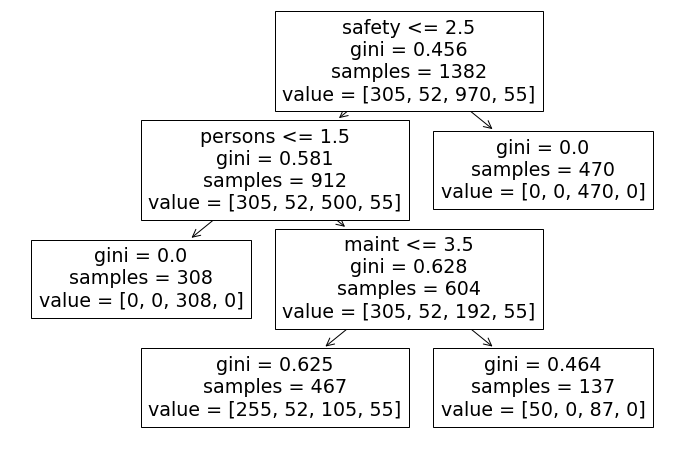

In [16]:
plt.figure(figsize=(12,8))

tree.plot_tree(model, feature_names=name_features) 

## SECTION 4: EVALUATION

  * Print the confusion matrix of the model
  * Print the classification report of the model


[[ 57   0  22   0]
 [ 17   0   0   0]
 [ 25   0 215   0]
 [ 10   0   0   0]]


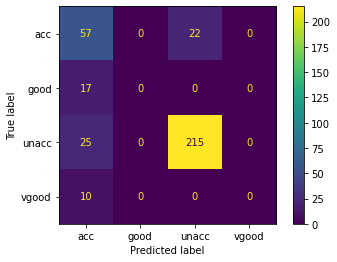

In [17]:
# Print the confusion matrix of the model

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# we can also plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test)

In [18]:
# Print the classification report of the model

print(classification_report(y_test, y_pred, target_names=unique_values))

              precision    recall  f1-score   support

       unacc       0.52      0.72      0.61        79
         acc       0.00      0.00      0.00        17
       vgood       0.91      0.90      0.90       240
        good       0.00      0.00      0.00        10

    accuracy                           0.79       346
   macro avg       0.36      0.40      0.38       346
weighted avg       0.75      0.79      0.76       346



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SECTION 5: OPTIONAL

  * Redo the analysis using the `entropy` criterion: `DecisionTreeClassifier(criterion='entropy', ...)`
  * How do the results change?
  * Can you tell what is best?

<hr>

### 1. Model using entropy Entropy

In [19]:
# Redo the analysis using the entropy criterion: DecisionTreeClassifier(criterion='entropy', ...)

model_entropy = decision_tree(X_train, y_train, 3, "entropy")

In [20]:
# How do the results change?

score(X_train, y_train, model_entropy, "training")
accuracy(X_test, y_test, model_entropy, "testing")

The score/mean accuracy on the training data for the decision tree with max_depth 3 is 78.36%
The accuracy score on the testing data for the decision tree with max_depth 3 is 75.43%


We recall the score/mean accuracy on the training data using the criterion 'gini' was 81.04%, while the accuracy score on the testing data using the same criterion was 78.61%. 

**Using the entropy criterion, the results/accuracy has slightly worsened**.

In [21]:
# Can you tell what is best?

Based on those preliminary results, **it seems that using the criterion 'gini' is the best way forward as using entropy does not seem to change the result in a positive manner**. However, since many other attributes for the decision tree classifier exist, limiting ourselves only to the criterion attribute might not be a best practice.

<hr>

<hr>

<hr>

### 2. Increasing max-depth

As such, **another way of achieving better results could be to vary other attributes** such as the **max depth** of the decision tree.

In [22]:
# example of modifying the max depth.

score = []
acc = []
for depth in range(4,10):
    model = decision_tree(X_train, y_train, depth)
    y_pred = model.predict(X_test)
    score.append(model.score(X_train, y_train))
    acc.append(accuracy_score(y_test, y_pred))
    if depth == 7: 
        saved_model=model # we save the model at max_depth=7 to plot and print an example confusion matrix and class. report

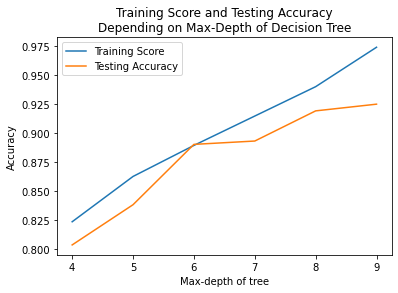

In [23]:
x = list(range(4,10))
plt.plot(x, score, label = "Training Score")
plt.plot(x, acc, label = "Testing Accuracy")
plt.xlabel('Max-depth of tree')
plt.ylabel('Accuracy')
plt.title('Training Score and Testing Accuracy\nDepending on Max-Depth of Decision Tree')
plt.legend()
plt.show()

We plot the confusion matrix for the model with max-depth 7:


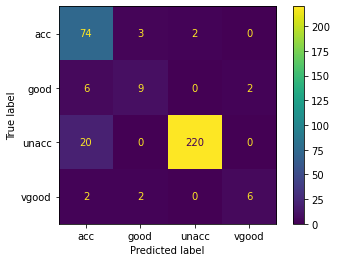

In [24]:
print("We plot the confusion matrix for the model with max-depth 7:")
plot_confusion_matrix(saved_model, X_test, y_test)

In [25]:
print(classification_report(y_test, saved_model.predict(X_test), target_names=unique_values))

              precision    recall  f1-score   support

       unacc       0.73      0.94      0.82        79
         acc       0.64      0.53      0.58        17
       vgood       0.99      0.92      0.95       240
        good       0.75      0.60      0.67        10

    accuracy                           0.89       346
   macro avg       0.78      0.75      0.75       346
weighted avg       0.91      0.89      0.90       346



We see that the predictions have improved on the class items ``acc`` and ``good``, which were problematic in our first run.

<hr>

### 3. Model setting max-depth to default, i.e. None

We want to test the results were we to remove any boundary on the max_depth of the tree.

In [26]:
model_no_max_depth = decision_tree(X_train, y_train)
y_pred = model_no_max_depth.predict(X_test)
print(f"The score on the train data with no set max depth is {round(100*model_no_max_depth.score(X_train, y_train),2)}%")
print(f"The accuracy score on the test data with no set max depth is {round(100*accuracy_score(y_test, y_pred),2)}%")

The score on the train data with no set max depth is 100.0%
The accuracy score on the test data with no set max depth is 95.09%


[Text(429.7165540540541, 420.384, 'safety <= 2.5\ngini = 0.456\nsamples = 1382\nvalue = [305, 52, 970, 55]'),
 Text(423.68412162162167, 391.392, 'persons <= 1.5\ngini = 0.581\nsamples = 912\nvalue = [305, 52, 500, 55]'),
 Text(417.65168918918926, 362.4, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(429.7165540540541, 362.4, 'maint <= 3.5\ngini = 0.628\nsamples = 604\nvalue = [305, 52, 192, 55]'),
 Text(241.1087837837838, 333.408, 'buying <= 1.5\ngini = 0.625\nsamples = 467\nvalue = [255, 52, 105, 55]'),
 Text(103.30540540540541, 304.416, 'safety <= 1.5\ngini = 0.691\nsamples = 119\nvalue = [45, 35, 6, 33]'),
 Text(64.84864864864865, 275.424, 'lug_boot <= 1.5\ngini = 0.61\nsamples = 60\nvalue = [9, 15, 3, 33]'),
 Text(39.21081081081081, 246.432, 'maint <= 2.5\ngini = 0.585\nsamples = 20\nvalue = [6, 11, 3, 0]'),
 Text(24.129729729729732, 217.44, 'maint <= 1.5\ngini = 0.615\nsamples = 13\nvalue = [6, 5, 2, 0]'),
 Text(12.064864864864866, 188.44799999999998, 'doors <= 3.5\ng

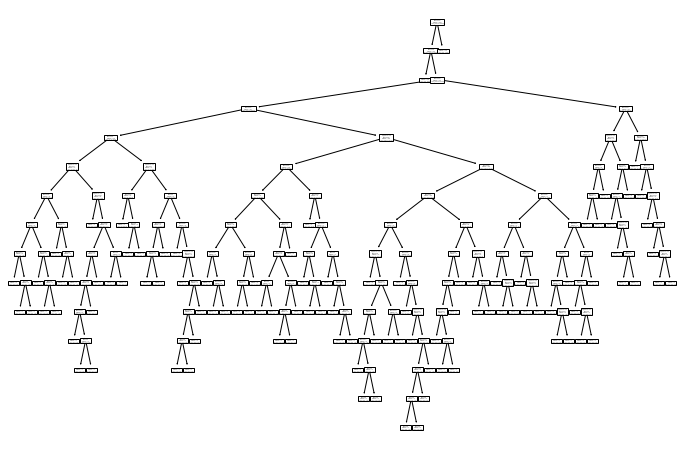

In [27]:
plt.figure(figsize=(12,8))

tree.plot_tree(model_no_max_depth, feature_names=name_features) 

This is not very readable. Though the test accuracy is high, the trade-off is that setting max_depth to none is definitely **not scalable** if we were to increase the size of the dataset.